In [1]:
# import pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# delete first 437 rows and the last row in the file, no column names
df = pd.read_csv('grady_data.csv', skiprows=437, skipfooter=1, engine='python', header=None)

In [3]:
# divide df into three subframes based in the value if the column 1, start_df with value s in coulmn 1, attempts_df with value a in column 1, final_df with value f in column 1
start_df = df[df[1] == 's']
attempts_df = df[df[1] == 'a']
final_df = df[df[1] == 'f']

In [4]:
# rename columns in start_df, 0 is "game_id", 1 is "status", 2 is "timestamp", 3 is "player_type", 4 is "game_type", 5 is "tolerance",  6 is "a", 7 is "b", 8 is "c", 9 is "min"
start_df.columns = ["game_id", "status", "timestamp", "player_type", "game_type", "tolerance", "a", "b", "c", "min"]
# drop rows where game_id is in [3657dd90, b02965, 1144fc11, a637af8, 1cdbfabd] (time outliers)
start_df = start_df[~start_df['game_id'].isin(['3657dd90', 'b02965', '1144fc11', 'a637af8', '1cdbfabd'])]

In [5]:
# How many games were started (Absolute counts)? Split into:
# game type
# player type
# by game level (maybe save it for later)

# count the number of games started
games_started = start_df['game_id'].count()
print("Number of games started: ", games_started)

# using start_df, count the number of games started by game type
game_type_count = start_df['game_type'].value_counts()
print("Number of games started by game type: ", game_type_count)

# using start_df, count the number of games started by player type
player_type_count = start_df['player_type'].value_counts()
print("Number of games started by player type: ", player_type_count)

# using start_df, count the number of games started by game level
game_level_count = start_df['tolerance'].value_counts()
print("Number of games started by game level: ", game_level_count)

Number of games started:  542
Number of games started by game type:  game_type
visual        273
analytical    269
Name: count, dtype: int64
Number of games started by player type:  player_type
nerd     195
bored    126
bird     119
both     102
Name: count, dtype: int64
Number of games started by game level:  tolerance
1.0    518
3.0     13
2.0     11
Name: count, dtype: int64


In [6]:
# rename columns in attmepts_df, 0 is "game_id", 1 is "status", 2 is "timestamp", 3 is "guess_number", 4 is "x", 5 is "y' and remove 4 last columns
attempts_df = attempts_df.drop(attempts_df.columns[[6, 7, 8, 9]], axis=1)
attempts_df.columns = ["game_id", "status", "timestamp", "guess_number", "x", "y"]

# drop rows where game_id is in [3657dd90, b02965, 1144fc11, a637af8, 1cdbfabd] (time outliers)
attempts_df = attempts_df[~attempts_df['game_id'].isin(['3657dd90', 'b02965', '1144fc11', 'a637af8', '1cdbfabd'])]

In [7]:
# in attempts_df group records by game_id
grouped = attempts_df.groupby('game_id')

# convert timestamp to int
attempts_df['timestamp'] = attempts_df['timestamp'].astype(int)

# within each group calculate difference between timestamps
attempts_df['timestamp_diff'] = grouped['timestamp'].diff()

#replace NaN values with 0
attempts_df['timestamp_diff'] = attempts_df['timestamp_diff'].fillna(0)

# convert timestamp_diff from millisocnds to seconds
attempts_df['timestamp_diff'] = attempts_df['timestamp_diff'] / 1000

# compute min, max, mean, median,  of the time between guesses
min_time_between_guesses = abs(attempts_df['timestamp_diff'].min())
max_time_between_guesses = attempts_df['timestamp_diff'].max()
mean_time_between_guesses = attempts_df['timestamp_diff'].mean()
median_time_between_guesses = attempts_df['timestamp_diff'].median()

# #print out the results in one string (add graphs??) (throw out outliers)
print("\nMin time between guesses: ", min_time_between_guesses, 'seconds',  "\nMax time between guesses: ", max_time_between_guesses, 'seconds', "\nMean time between guesses: ", mean_time_between_guesses, 'seconds', "\nMedian time between guesses: ", median_time_between_guesses, 'seconds')


Min time between guesses:  1.139 seconds 
Max time between guesses:  805.736 seconds 
Mean time between guesses:  7.4728969521045 seconds 
Median time between guesses:  4.115 seconds


In [8]:
# in finish_df remove 5 last columns and rename remainng columns 1-5 as "game_id","f","timestamp","num_guesses","outcome"
finish_df = df[df[1] == 'f']
finish_df = finish_df.drop(finish_df.columns[[5, 6, 7, 8, 9]], axis=1)
finish_df.columns = ["game_id", "status", "timestamp", "num_guesses", "outcome"]
# drop rows where game_id is in [3657dd90, b02965, 1144fc11, a637af8, 1cdbfabd] (time outliers)
finish_df = finish_df[~finish_df['game_id'].isin(['3657dd90', 'b02965', '1144fc11', 'a637af8', '1cdbfabd'])]

In [9]:
# How many games were finished (Absolute counts)? Split into:
# abandoned
# won
# lost

# using start_df and finish_df count how many start game_id not in the finish game_id
abandoned_games = start_df[~start_df['game_id'].isin(finish_df['game_id'])]
abandoned_games = abandoned_games['game_id'].count()
print("Number of abandoned games: ", abandoned_games)

# using finish_df cout the total number of games finished
total_games_finished = finish_df['outcome'].count()
print("Total number of games finished: ", total_games_finished)

# using finish_df, count the number of games finished by outcome
outcome_count = finish_df['outcome'].value_counts()
print("Number of games finished by outcome: ", outcome_count)

Number of abandoned games:  292
Total number of games finished:  250
Number of games finished by outcome:  outcome
Hooray!    214
Alas!       36
Name: count, dtype: int64


In [10]:
# using start_df and finish_df, compute average time to solve the game
# merge start_df and finish_df on game_id
start_finish_df = pd.merge(start_df, finish_df, on='game_id')

# using the merged dataframe, compute the time to solve the game, 
# first cast timestamp_start and timestamp_finish to int, then compute the difference
start_finish_df['timestamp_start'] = start_finish_df['timestamp_x'].astype(int) 
start_finish_df['timestamp_finish'] = start_finish_df['timestamp_y'].astype(int)
start_finish_df['time_to_solve'] = start_finish_df['timestamp_finish'] - start_finish_df['timestamp_start']
# now time_to_solve in milliseconds, convert it to minutes
start_finish_df['time_to_solve'] = start_finish_df['time_to_solve'] / 60000
start_finish_df

,game_id,status_x,timestamp_x,player_type,game_type,tolerance,a,b,c,min,status_y,timestamp_y,num_guesses,outcome,timestamp_start,timestamp_finish,time_to_solve
0,608611d,s,1710907012504,both,visual,1.0,2.977267,5.348519,9.878772,-0.898226,f,1710907175656,10,Hooray!,1710907012504,1710907175656,2.719200
1,25ed8225,s,1710945492578,bird,analytical,1.0,4.956429,5.733416,8.261064,-0.578382,f,1710945755900,14,Hooray!,1710945492578,1710945755900,4.388700
2,35693377,s,1710945787097,nerd,visual,1.0,1.347889,-2.620862,-2.291495,0.972210,f,1710945885965,4,Hooray!,1710945787097,1710945885965,1.647800
3,1618a060,s,1711064541815,nerd,visual,1.0,3.837024,-3.776831,-7.683637,0.492156,f,1711064549007,4,Hooray!,1711064541815,1711064549007,0.119867
4,17022b9,s,1711934437700,bored,analytical,1.0,2.064447,-9.290401,-1.434836,2.250095,f,1711934560807,15,Hooray!,1711934437700,1711934560807,2.051783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,7f7ab80,s,1714243101640,both,visual,1.0,1.884010,1.521726,5.413457,-0.403853,f,1714243185634,4,Alas!,1714243101640,1714243185634,1.399900
246,1e14eedc,s,1714243199318,both,analytical,1.0,6.610691,5.206687,-0.183987,-0.393808,f,1714243252628,6,Alas!,1714243199318,1714243252628,0.888500
247,36ec8b01,s,1714514628319,bored,analytical,1.0,7.028829,-0.251834,8.490923,0.017914,f,1714514723911,14,Hooray!,1714514628319,1714514723911,1.593200
248,2bdb7c08,s,1714514926432,nerd,visual,1.0,0.305975,0.660201,6.251355,-1.078848,f,1714514993625,13,Hooray!,1714514926432,1714514993625,1.119883


In [11]:
analysis_df = start_finish_df[['game_type', 'num_guesses', 'outcome']]
# save to csv
analysis_df

,game_type,num_guesses,outcome
0,visual,10,Hooray!
1,analytical,14,Hooray!
2,visual,4,Hooray!
3,visual,4,Hooray!
4,analytical,15,Hooray!
...,...,...,...
245,visual,4,Alas!
246,analytical,6,Alas!
247,analytical,14,Hooray!
248,visual,13,Hooray!


/tmp/ipykernel_167811/3201888895.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['num_guesses'] = analysis_df['num_guesses'].astype(int)


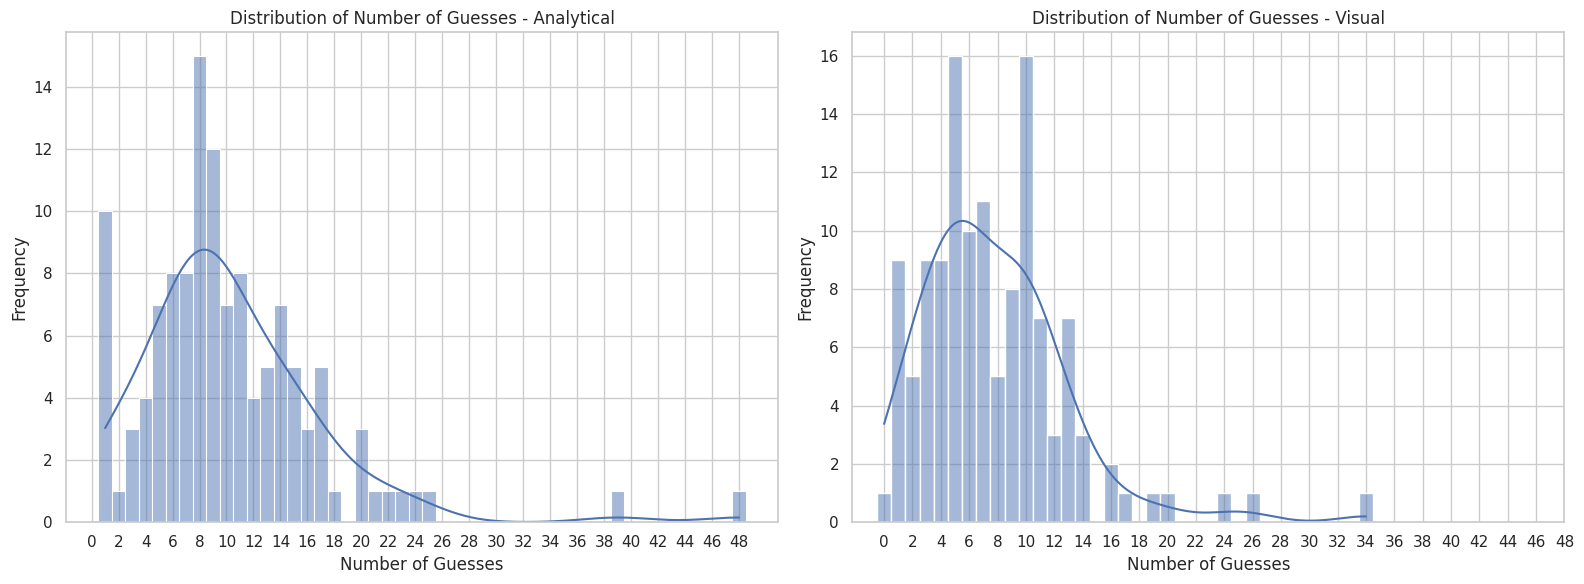

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'analysis_df' is your DataFrame
# Convert 'num_guesses' to integers if they are not already
analysis_df['num_guesses'] = analysis_df['num_guesses'].astype(int)

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the histogram for 'analytical' game type
sns.histplot(data=analysis_df[analysis_df['game_type'] == 'analytical'], x='num_guesses', 
             ax=axes[0], bins=range(analysis_df['num_guesses'].min(), analysis_df['num_guesses'].max() + 2), 
             discrete=True, kde=True)
axes[0].set_title('Distribution of Number of Guesses - Analytical')
axes[0].set_xlabel('Number of Guesses')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(range(analysis_df['num_guesses'].min(), analysis_df['num_guesses'].max() + 1, 2))

# Plot the histogram for 'visual' game type
sns.histplot(data=analysis_df[analysis_df['game_type'] == 'visual'], x='num_guesses', 
             ax=axes[1], bins=range(analysis_df['num_guesses'].min(), analysis_df['num_guesses'].max() + 2), 
             discrete=True, kde=True)
axes[1].set_title('Distribution of Number of Guesses - Visual')
axes[1].set_xlabel('Number of Guesses')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(range(analysis_df['num_guesses'].min(), analysis_df['num_guesses'].max() + 1, 2))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [28]:
# Ensure that 'num_guesses' is numeric
analysis_df['num_guesses'] = pd.to_numeric(analysis_df['num_guesses'], errors='coerce')

# Group the data by 'player_type' and 'game_type' and calculate mean, std, and count
grouped_data = analysis_df.groupby(['game_type'])
df_hsd = grouped_data['num_guesses'].agg(['mean', 'std', 'count']).reset_index()

# Rename the columns for clarity
df_hsd.columns = ['group', 'mean', 'stderr', 'count']

# Calculate the standard error (stderr)
df_hsd['stderr'] = df_hsd['stderr'] / np.sqrt(df_hsd['count'])


/tmp/ipykernel_167811/1473596822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['num_guesses'] = pd.to_numeric(analysis_df['num_guesses'], errors='coerce')


In [29]:
df_hsd

,group,mean,stderr,count
0,analytical,10.252033,0.619940,123
1,visual,7.787402,0.463602,127


<Figure size 2000x1200 with 0 Axes>

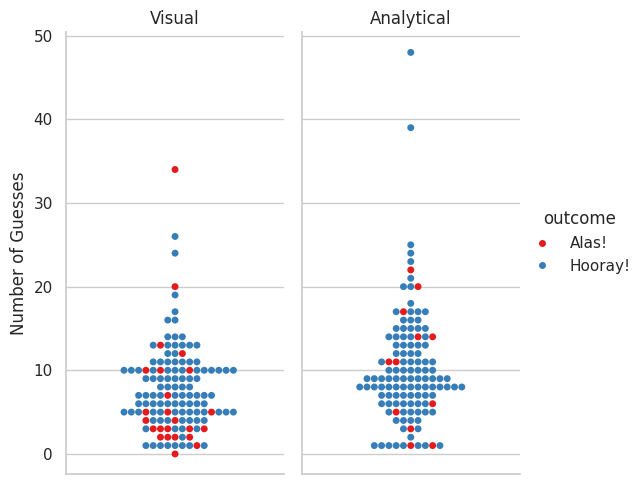

In [37]:
# Create a facet grid using catplot, mapping 'outcome' to the hue and creating a separate column for each 'game_type'
plt.figure(figsize=(20, 12))
g = sns.catplot(
    data=analysis_df,     
    y='num_guesses',   
    hue='outcome',      
    col='game_type',    
    kind='swarm',          
    errorbar=None,             
    aspect=0.55,
    palette='Set1'          
)
g.tick_params(left=False, bottom=False)
#sns.despine(left=True, bottom=True)
#sns.set_context("paper", font_scale=1)


# Remove the player_type label at the bottom
g.set(xlabel=None)
g.set(ylabel="Number of Guesses")

# Update the titles for the game types
g.set_titles("{col_name}")

# Update title names manually
for ax, title in zip(g.axes.flat, ['Visual', 'Analytical']):
    ax.set_title(title)

# Show the plot
plt.show()


<Figure size 1600x1200 with 0 Axes>

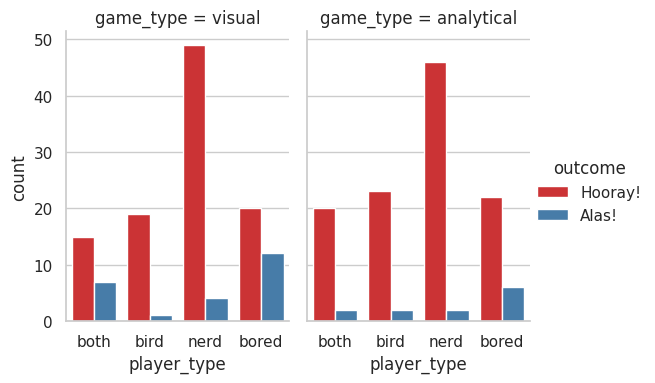

In [31]:
# create a new separate dataframe s_f_df with player_type, game_type, tolerance, outcome, num_guesses, time_to_solve
s_f_df = start_finish_df[['game_id', 'player_type', 'game_type', 'tolerance', 'outcome', 'num_guesses', 'time_to_solve']]

# create a plot that shows relationship between nerd player type, game type, and outcomes
plt.figure(figsize=(16, 12))
sns.catplot(x="player_type", hue="outcome", col="game_type", data=s_f_df, kind="count", height=4, aspect=.7, palette='Set1')
plt.show()


In [32]:
# Average, min, max, and median for:
# time per game (start to finish)
# number of guesses per game

# using start_finish_df, compute min max and median for time to solve the game
min_time_to_solve = start_finish_df['time_to_solve'].min()
max_time_to_solve = start_finish_df['time_to_solve'].max()
median_time_to_solve = start_finish_df['time_to_solve'].median()
average_time_to_solve = start_finish_df['time_to_solve'].mean()
print('\n',"Min time to solve the game (minutes): ", min_time_to_solve, '\n', "Max time to solve the game (minutes): ", max_time_to_solve, '\n', "Median time to solve the game (minutes): ", median_time_to_solve, '\n', "Average time to solve the game (minutes): ", average_time_to_solve)

# using start_finish_df, compute min max and median for number of guesses per game
start_finish_df['num_guesses'] = pd.to_numeric(start_finish_df['num_guesses'], errors='coerce')
min_num_guesses = start_finish_df['num_guesses'].min()
max_num_guesses = start_finish_df['num_guesses'].max()
median_num_guesses = start_finish_df['num_guesses'].median()
average_num_guesses = start_finish_df['num_guesses'].mean()
print('\n',"Min number of guesses per game: ", min_num_guesses, '\n', "Max number of guesses per game: ", max_num_guesses, '\n', "Median number of guesses per game: ", median_num_guesses, '\n', "Average number of guesses per game: ", average_num_guesses)


 Min time to solve the game (minutes):  0.03315 
 Max time to solve the game (minutes):  17.41935 
 Median time to solve the game (minutes):  0.9708749999999999 
 Average time to solve the game (minutes):  1.3464050666666667

 Min number of guesses per game:  0 
 Max number of guesses per game:  48 
 Median number of guesses per game:  8.0 
 Average number of guesses per game:  9.0


In [33]:
# from start_finish_df, compute the average time to solve the game, using rows where outcome is "Hooray!"
start_finish_wins_df = start_finish_df[start_finish_df['outcome'] == 'Hooray!']
avg_time_to_solve_win = start_finish_wins_df['time_to_solve'].mean()

print("Average time to win the game is", avg_time_to_solve_win, "minutes")

start_finish_alas_df = start_finish_df[start_finish_df['outcome'] == 'Alas!']
avg_time_to_solve_alas = start_finish_alas_df['time_to_solve'].mean()

print("Average time to give up on game is", avg_time_to_solve_alas, "minutes")

Average time to win the game is 1.2685702492211837 minutes
Average time to give up on game is 1.8090898148148145 minutes


In [34]:
# in start_finish_df, compute the average number of guesses to solve the game where outcome is "Hooray!", cast num_guesses to int
avg_num_guesses_win = start_finish_wins_df['num_guesses'].mean()

print("Average number of guesses to solve the game when outcome is 'Hooray!': ", avg_num_guesses_win)

# do the same for outcome "Alas!"
avg_num_guesses_alas = start_finish_alas_df['num_guesses'].mean()

print("Average number of guesses to solve the game when outcome is 'Alas!': ", avg_num_guesses_alas)

Average number of guesses to solve the game when outcome is 'Hooray!':  9.16822429906542
Average number of guesses to solve the game when outcome is 'Alas!':  8.0


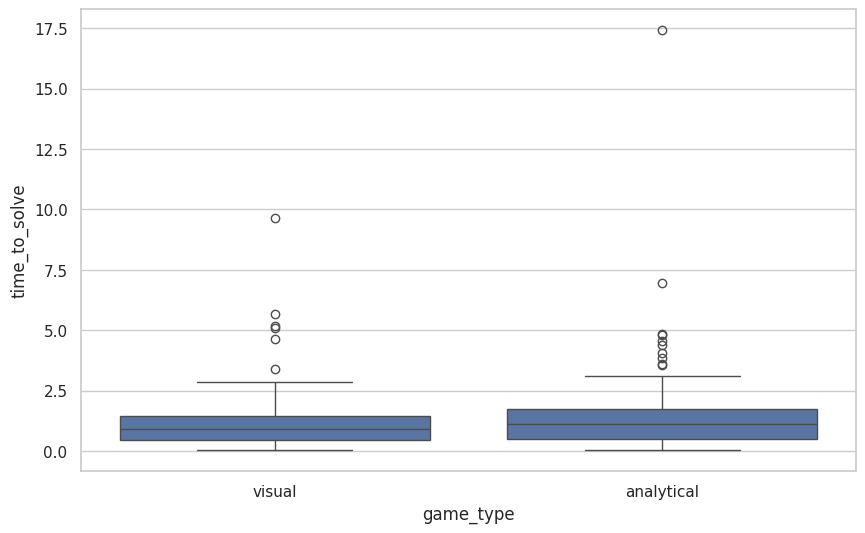

In [35]:
# using start_finish_df, display relationship between time to solve the game and game type
plt.figure(figsize=(10, 6))
sns.boxplot(x='game_type', y='time_to_solve', data=start_finish_df)
plt.show()

# the plot suggests that games solved using visual methods typically required less time 
# and had less variability in the time to solve than those solved using analytical methods 
# however, both methods have cases where the time to solve was much longer than the average, as indicated by the outliers

TypeError: 'numpy.float64' object cannot be interpreted as an integer

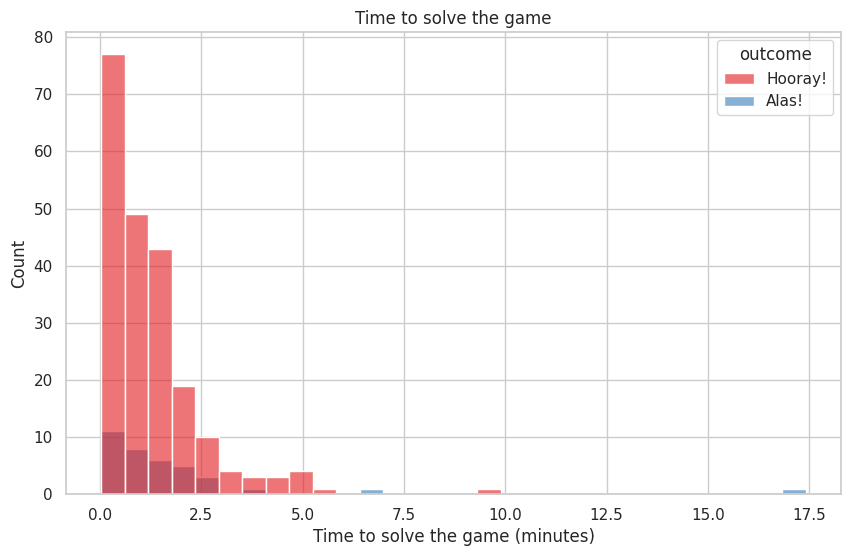

In [38]:
max_time = start_finish_df['time_to_solve'].max()
# using start_finish_df plot a histogram of the time to solve the game for both outcomes
plt.figure(figsize=(10, 6))
sns.histplot(data=start_finish_df, x='time_to_solve', hue='outcome', bins=30, alpha=0.6, palette='Set1')
plt.title('Time to solve the game')
plt.xlabel('Time to solve the game (minutes)')
plt.xticks(range(0, max_time+1, 1))
plt.ylabel('Number of games')
plt.show()

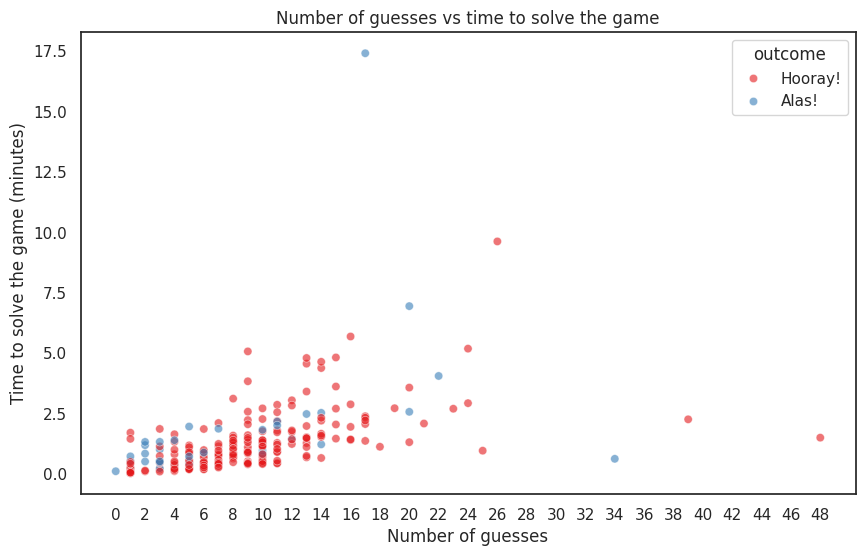

In [39]:
# plot the realtionship between number of guesses and time to solve the game, diffenret colors for different outcomes, cast num_guesses to int, display only round numbers
start_finish_df['num_guesses'] = start_finish_df['num_guesses'].astype(int)
plt.figure(figsize=(10, 6))
sns.set_style("white")
sns.scatterplot(data=start_finish_df, x='num_guesses', y='time_to_solve', hue='outcome', alpha=0.6, palette='Set1')
plt.title('Number of guesses vs time to solve the game')
plt.xlabel('Number of guesses')
plt.ylabel('Time to solve the game (minutes)')
# gte maximum number of guesses from start_finish_df
max_guesses = start_finish_df['num_guesses'].max()
plt.xticks(range(0, max_guesses+1, 2))
plt.show()

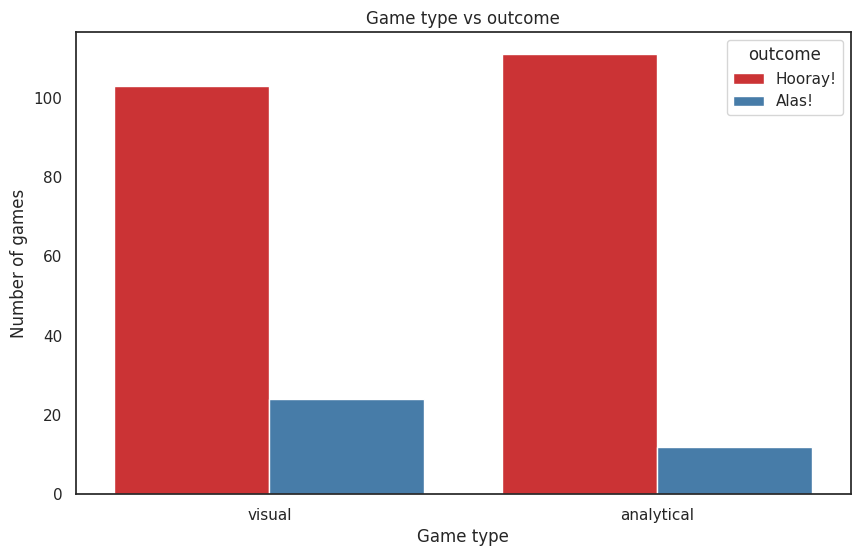

In [40]:
# plot realtionship between game_type and outcomes
plt.figure(figsize=(10, 6))
sns.countplot(data=start_finish_df, x='game_type', hue='outcome', palette='Set1')
plt.title('Game type vs outcome')
plt.xlabel('Game type')
plt.ylabel('Number of games')
plt.show()

Text(0.5, 1.0, 'Player type vs outcome')

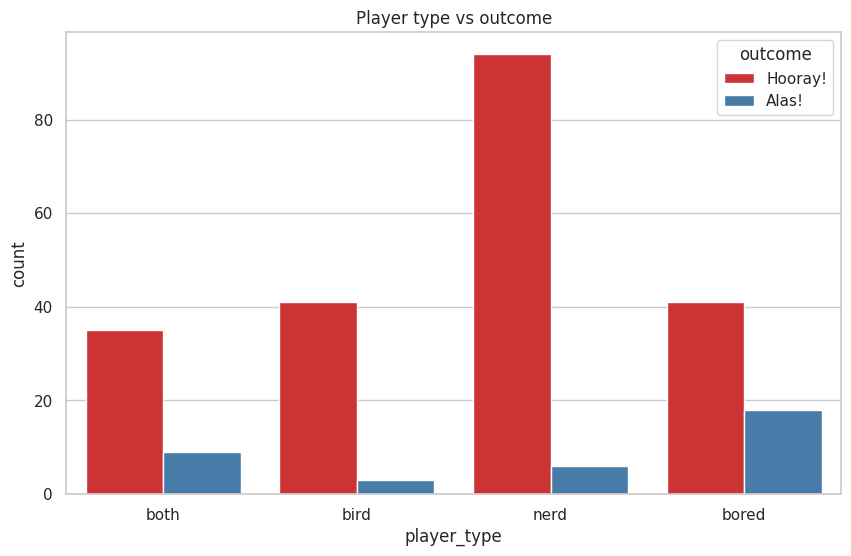

In [ ]:
# plot relationship between player_type and outcomes
plt.figure(figsize=(10, 6))
sns.countplot(data=start_finish_df, x='player_type', hue='outcome', palette='Set1')
plt.title('Player type vs outcome')

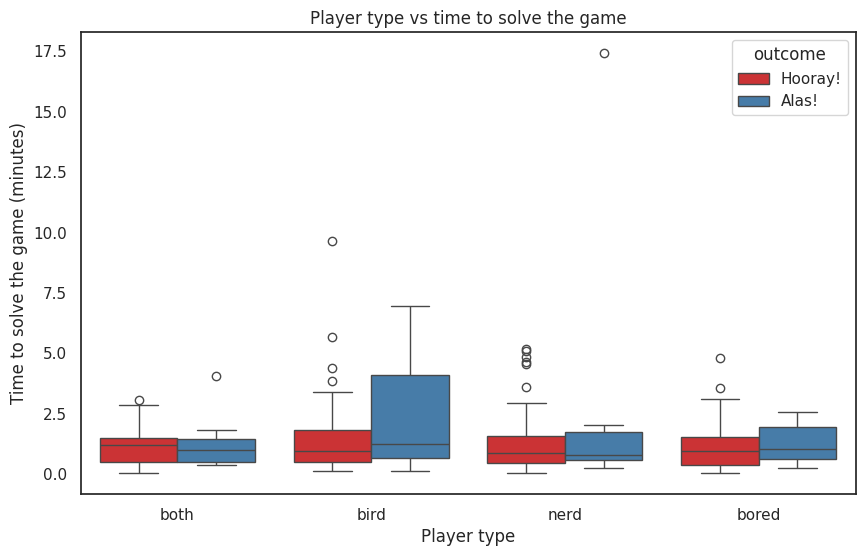

In [41]:
# plot relationship between player type and time to solve the game, hue is outcome
plt.figure(figsize=(10, 6))
sns.boxplot(data=start_finish_df, x='player_type', y='time_to_solve', hue='outcome', palette='Set1')
plt.title('Player type vs time to solve the game')
plt.xlabel('Player type')
plt.ylabel('Time to solve the game (minutes)')
plt.show()

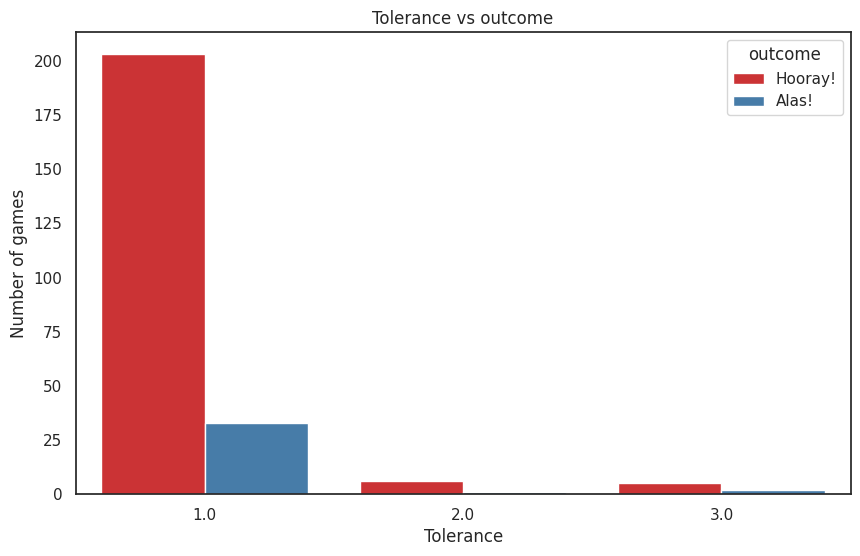

In [42]:
# plot relationship between tolerance and outcomes
plt.figure(figsize=(10, 6))
sns.countplot(data=start_finish_df, x='tolerance', hue='outcome', palette='Set1')
plt.title('Tolerance vs outcome')
plt.xlabel('Tolerance')
plt.ylabel('Number of games')
plt.show()

In [44]:
# gen_pop 1711929600000 - 1712275140000 apr 1 01  - apr 4 23:59
# uni students 1712275200000 - 1712534340000 april 5 - april 7 23:59
# high school students / shanghai tech 1712534400000 - 1712793540000 april 8 - april 10 23:59
# CS2A students 1712879940000 - 1712966340000 april 11 - april 12 23:59
# social media / shanghai non-tech 1712966400000 - 1713225540000 -  april 13 - april 15 23:59
# Foothill NONSTEM  1713225600000 - 1713484740000 april 16 - april 18 23:59
# Foothill STEM 1713484800000 - april 19 -

# split start_finish_df into 6 dataframes based on the timestamp
gen_pop_df = start_finish_df[(start_finish_df['timestamp_start'] >= 1711929600000) & (start_finish_df['timestamp_start'] <= 1712275140000)]
uni_students_df = start_finish_df[(start_finish_df['timestamp_start'] >= 1712275200000) & (start_finish_df['timestamp_start'] <= 1712534340000)]
high_school_students_df = start_finish_df[(start_finish_df['timestamp_start'] >= 1712534400000) & (start_finish_df['timestamp_start'] <= 1712793540000)]
cs2a_students_df = start_finish_df[(start_finish_df['timestamp_start'] >= 1712879940000) & (start_finish_df['timestamp_start'] <= 1712966340000)]
social_media_df = start_finish_df[(start_finish_df['timestamp_start'] >= 1712966400000) & (start_finish_df['timestamp_start'] <= 1713225540000)]
foothill_nonstem_df = start_finish_df[(start_finish_df['timestamp_start'] >= 1713225600000) & (start_finish_df['timestamp_start'] <= 1713484740000)]
foothill_stem_df = start_finish_df[(start_finish_df['timestamp_start'] >= 1713484800000)]

# compute average time to solve the game for each group
avg_time_to_solve_gen_pop = gen_pop_df['time_to_solve'].mean()
avg_time_to_solve_uni_students = uni_students_df['time_to_solve'].mean()
avg_time_to_solve_high_school_students = high_school_students_df['time_to_solve'].mean()
avg_time_to_solve_cs2a_students = cs2a_students_df['time_to_solve'].mean()
avg_time_to_solve_social_media = social_media_df['time_to_solve'].mean()
avg_time_to_solve_foothill_nonstem = foothill_nonstem_df['time_to_solve'].mean()
avg_time_to_solve_foothill_stem = foothill_stem_df['time_to_solve'].mean()
avg_time_to_solve_foothill_stem = foothill_stem_df['time_to_solve'].mean()

print('\n',"Average time to solve the game for general population: ", avg_time_to_solve_gen_pop, '\n', "Average time to solve the game for university students: ", avg_time_to_solve_uni_students, '\n', "Average time to solve the game for high school students: ", avg_time_to_solve_high_school_students, '\n', "Average time to solve the game for CS2A students: ", avg_time_to_solve_cs2a_students, '\n', "Average time to solve the game for social media users: ", avg_time_to_solve_social_media, '\n', "Average time to solve the game for Foothill NONSTEM students: ", avg_time_to_solve_foothill_nonstem)

# create a graph for the data above






 Average time to solve the game for general population:  1.273486111111111 
 Average time to solve the game for university students:  2.02464375 
 Average time to solve the game for high school students:  1.3389357142857143 
 Average time to solve the game for CS2A students:  0.5859388888888888 
 Average time to solve the game for social media users:  1.0442649659863945 
 Average time to solve the game for Foothill NONSTEM students:  1.3290673913043476


Text(0, 0.5, 'Mean time to solve the game (minutes)')

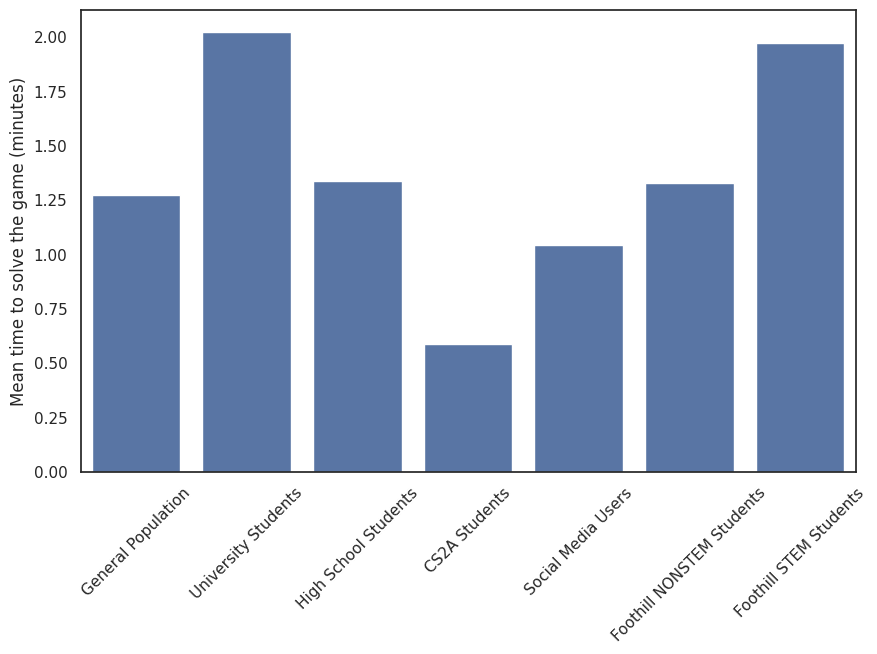

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x=['General Population', 'University Students', 'High School Students', 'CS2A Students', 'Social Media Users', 'Foothill NONSTEM Students', 'Foothill STEM Students'], y=[avg_time_to_solve_gen_pop, avg_time_to_solve_uni_students, avg_time_to_solve_high_school_students, avg_time_to_solve_cs2a_students, avg_time_to_solve_social_media, avg_time_to_solve_foothill_nonstem, avg_time_to_solve_foothill_stem])
# rotate x labels
plt.xticks(rotation=45)
# mark the y axis "Mean time to solve the game (minutes)" 
plt.ylabel('Mean time to solve the game (minutes)')

In [ ]:
# using gen_pop_df, count how many start game_id not in the finish game_id
# gen_pop game_id is in start_df but not in finish_df
gen_pop_start =  start_df[(start_df['timestamp'] >= 1711929600000) & (start_df['timestamp'] <= 1712275140000)]
gen_pop_finish = finish_df[(finish_df['timestamp'] >= 1711929600000) & (finish_df['timestamp'] <= 1712275140000)]
abandoned_games_gen_pop = gen_pop_start['game_id'].count() - gen_pop_finish['game_id'].count()
print("Number of abandoned games for general population: ", abandoned_games_gen_pop)
print(gen_pop_start.count())

# same calculations for uni_students_df
uni_students_start =  start_df[(start_df['timestamp'] >= 1712275200000) & (start_df['timestamp'] <= 1712534340000)]
uni_students_finish = finish_df[(finish_df['timestamp'] >= 1712275200000) & (finish_df['timestamp'] <= 1712534340000)]
abandoned_games_uni_students = uni_students_start['game_id'].count() - uni_students_finish['game_id'].count()
print("Number of abandoned games for university students: ", abandoned_games_uni_students)
print(uni_students_start.count())

# same calculations for high_school_students_df
high_school_students_start =  start_df[(start_df['timestamp'] >= 1712534400000) & (start_df['timestamp'] <= 1712793540000)]
high_school_students_finish = finish_df[(finish_df['timestamp'] >= 1712534400000) & (finish_df['timestamp'] <= 1712793540000)]
abandoned_games_high_school_students = high_school_students_start['game_id'].count() - high_school_students_finish['game_id'].count()
print("Number of abandoned games for high school students: ", abandoned_games_high_school_students)
print(high_school_students_start.count())


Number of abandoned games for general population:  54
game_id        108
status         108
timestamp      108
player_type    108
game_type      108
tolerance      108
a              108
b              108
c              108
min            108
dtype: int64
Number of abandoned games for university students:  25
game_id        33
status         33
timestamp      33
player_type    33
game_type      33
tolerance      33
a              33
b              33
c              33
min            33
dtype: int64
Number of abandoned games for high school students:  25
game_id        53
status         53
timestamp      53
player_type    53
game_type      53
tolerance      53
a              53
b              53
c              53
min            53
dtype: int64


In [46]:
# same calculations for cs2a_students_df
cs2a_students_start =  start_df[(start_df['timestamp'] >= 1712879940000) & (start_df['timestamp'] <= 1712966340000)]
cs2a_students_finish = finish_df[(finish_df['timestamp'] >= 1712879940000) & (finish_df['timestamp'] <= 1712966340000)]
abandoned_games_cs2a_students = cs2a_students_start['game_id'].count() - cs2a_students_finish['game_id'].count()
print("Number of abandoned games for CS2A students: ", abandoned_games_cs2a_students)
print(cs2a_students_start.count())

# same calculations for social_media_df
social_media_start =  start_df[(start_df['timestamp'] >= 1712966400000) & (start_df['timestamp'] <= 1713225540000)]
social_media_finish = finish_df[(finish_df['timestamp'] >= 1712966400000) & (finish_df['timestamp'] <= 1713225540000)]
abandoned_games_social_media = social_media_start['game_id'].count() - social_media_finish['game_id'].count()
print("Number of abandoned games for social media users: ", abandoned_games_social_media)
print(social_media_start.count())

# same calculations for foothill_nonstem_df
foothill_nonstem_start =  start_df[(start_df['timestamp'] >= 1713225600000) & (start_df['timestamp'] <= 1713484740000)]
foothill_nonstem_finish = finish_df[(finish_df['timestamp'] >= 1713225600000) & (finish_df['timestamp'] <= 1713484740000)]
abandoned_games_foothill_nonstem = foothill_nonstem_start['game_id'].count() - foothill_nonstem_finish['game_id'].count()
print("Number of abandoned games for Foothill NONSTEM students: ", abandoned_games_foothill_nonstem)
print(foothill_nonstem_start.count())

# same calculations for foothill_stem_df
foothill_stem_start =  start_df[(start_df['timestamp'] >= 1713484800000)]
foothill_stem_finish = finish_df[(finish_df['timestamp'] >= 1713484800000)]
abandoned_games_foothill_stem = foothill_stem_start['game_id'].count() - foothill_stem_finish['game_id'].count()
print("Number of abandoned games for Foothill STEM students: ", abandoned_games_foothill_stem)
print(foothill_stem_start.count())




Number of abandoned games for CS2A students:  2
game_id        11
status         11
timestamp      11
player_type    11
game_type      11
tolerance      11
a              11
b              11
c              11
min            11
dtype: int64
Number of abandoned games for social media users:  72
game_id        121
status         121
timestamp      121
player_type    121
game_type      121
tolerance      121
a              121
b              121
c              121
min            121
dtype: int64
Number of abandoned games for Foothill NONSTEM students:  35
game_id        58
status         58
timestamp      58
player_type    58
game_type      58
tolerance      58
a              58
b              58
c              58
min            58
dtype: int64
Number of abandoned games for Foothill STEM students:  51
game_id        99
status         99
timestamp      99
player_type    99
game_type      99
tolerance      99
a              99
b              99
c              99
min            99
dtype: int

In [ ]:
# using dataframes above:
# How many games were started (Absolute counts)? Split into:
# game type
# player type
# by game level (maybe save it for later)
# How many games were finished (Absolute counts)? Split into:
# abandoned
# won
# lost
# Average, min, max, and median for:
# time per game (start to finish)
# time per move
# number of moves per game (split by outcome)

# using gen_pop_df, count the number of games started by game type
game_type_count_gen_pop = gen_pop_df['game_type'].value_counts()
print("Number of games started by game type for general population: ", game_type_count_gen_pop)

# using gen_pop_df, count the number of games started by player type
player_type_count_gen_pop = gen_pop_df['player_type'].value_counts()
print("Number of games started by player type for general population: ", player_type_count_gen_pop)

# using gen_pop_df, count the number of games started by game level
game_level_count_gen_pop = gen_pop_df['tolerance'].value_counts()
print("Number of games started by game level for general population: ", game_level_count_gen_pop)

# using gen_pop_df, count how many start game_id not in the finish game_id
# gen_pop game_id is in start_df but not in finish_df

abandoned_games_gen_pop = gen_pop_df[~gen_pop_df['game_id'].isin(finish_df['game_id'])]
abandoned_games_gen_pop = abandoned_games_gen_pop['game_id'].count()
print("Number of abandoned games for general population: ", abandoned_games_gen_pop)

# using gen_pop_df, count the total number of games finished
total_games_finished_gen_pop = gen_pop_df[gen_pop_df['game_id'].isin(finish_df['game_id'])]
total_games_finished_gen_pop = total_games_finished_gen_pop['game_id'].count()
print("Total number of games finished for general population: ", total_games_finished_gen_pop)

# using finish_df, count the number of games finished by outcome
outcome_count_gen_pop = gen_pop_df[gen_pop_df['game_id'].isin(finish_df['game_id'])]
outcome_count_gen_pop = outcome_count_gen_pop['outcome'].value_counts()
print("Number of games finished by outcome for general population: ", outcome_count_gen_pop)

# using gen_pop_df, compute min max and median for time to solve the game
min_time_to_solve_gen_pop = gen_pop_df['time_to_solve'].min()
max_time_to_solve_gen_pop = gen_pop_df['time_to_solve'].max()
median_time_to_solve_gen_pop = gen_pop_df['time_to_solve'].median()
average_time_to_solve_gen_pop = gen_pop_df['time_to_solve'].mean()
print('\n',"Min time to solve the game for general population (minutes): ", min_time_to_solve_gen_pop, '\n', "Max time to solve the game for general population (minutes): ", max_time_to_solve_gen_pop, '\n', "Median time to solve the game for general population (minutes): ", median_time_to_solve_gen_pop, '\n', "Average time to solve the game for general population (minutes): ", average_time_to_solve_gen_pop)

# using gen_pop_df, compute min max and median for number of guesses per game
min_num_guesses_gen_pop = gen_pop_df['num_guesses'].min()
max_num_guesses_gen_pop = gen_pop_df['num_guesses'].max()
median_num_guesses_gen_pop = gen_pop_df['num_guesses'].median()
average_num_guesses_gen_pop = gen_pop_df['num_guesses'].mean()
print('\n',"Min number of guesses per game for general population: ", min_num_guesses_gen_pop, '\n', "Max number of guesses per game for general population: ", max_num_guesses_gen_pop, '\n', "Median number of guesses per game for general population: ", median_num_guesses_gen_pop, '\n', "Average number of guesses per game for general population: ", average_num_guesses_gen_pop)


Number of games started by game type for general population:  game_type
visual        30
analytical    24
Name: count, dtype: int64
Number of games started by player type for general population:  player_type
nerd     26
bored    14
bird      8
both      6
Name: count, dtype: int64
Number of games started by game level for general population:  tolerance
1.0    45
2.0     5
3.0     4
Name: count, dtype: int64
Number of abandoned games for general population:  0
Total number of games finished for general population:  54
Number of games finished by outcome for general population:  outcome
Hooray!    48
Alas!       6
Name: count, dtype: int64

 Min time to solve the game for general population (minutes):  0.0624 
 Max time to solve the game for general population (minutes):  5.191133333333333 
 Median time to solve the game for general population (minutes):  0.8194416666666666 
 Average time to solve the game for general population (minutes):  1.273486111111111

 Min number of guesses per g

In [ ]:
# repeat the code above for the rest of the dataframes

# using uni_students_df, count the number of games started by game type
game_type_count_uni_students = uni_students_df['game_type'].value_counts()
print("Number of games started by game type for university students: ", game_type_count_uni_students)

# using uni_students_df, count the number of games started by player type
player_type_count_uni_students = uni_students_df['player_type'].value_counts()
print("Number of games started by player type for university students: ", player_type_count_uni_students)

# using uni_students_df, count the number of games started by game level
game_level_count_uni_students = uni_students_df['tolerance'].value_counts()
print("Number of games started by game level for university students: ", game_level_count_uni_students)

# using uni_students_df, count how many start game_id not in the finish game_id
abandoned_games_uni_students = uni_students_df[~uni_students_df['game_id'].isin(finish_df['game_id'])]
abandoned_games_uni_students = abandoned_games_uni_students['game_id'].count()
print("Number of abandoned games for university students: ", abandoned_games_uni_students)

# using uni_students_df, count the total number of games finished
total_games_finished_uni_students = uni_students_df[uni_students_df['game_id'].isin(finish_df['game_id'])]
total_games_finished_uni_students = total_games_finished_uni_students['game_id'].count()
print("Total number of games finished for university students: ", total_games_finished_uni_students)

# using finish_df, count the number of games finished by outcome
outcome_count_uni_students = uni_students_df[uni_students_df['game_id'].isin(finish_df['game_id'])]
outcome_count_uni_students = outcome_count_uni_students['outcome'].value_counts()
print("Number of games finished by outcome for university students: ", outcome_count_uni_students)

# using uni_students_df, compute min max and median for time to solve the game
min_time_to_solve_uni_students = uni_students_df['time_to_solve'].min()
max_time_to_solve_uni_students = uni_students_df['time_to_solve'].max()
median_time_to_solve_uni_students = uni_students_df['time_to_solve'].median()
average_time_to_solve_uni_students = uni_students_df['time_to_solve'].mean()
print('\n',"Min time to solve the game for university students (minutes): ", min_time_to_solve_uni_students, '\n', "Max time to solve the game for university students (minutes): ", max_time_to_solve_uni_students, '\n', "Median time to solve the game for university students (minutes): ", median_time_to_solve_uni_students, '\n', "Average time to solve the game for university students (minutes): ", average_time_to_solve_uni_students)

# using uni_students_df, compute min max and median for number of guesses per game
min_num_guesses_uni_students = uni_students_df['num_guesses'].min()
max_num_guesses_uni_students = uni_students_df['num_guesses'].max()
median_num_guesses_uni_students = uni_students_df['num_guesses'].median()
average_num_guesses_uni_students = uni_students_df['num_guesses'].mean()
print('\n',"Min number of guesses per game for university students: ", min_num_guesses_uni_students, '\n', "Max number of guesses per game for university students: ", max_num_guesses_uni_students, '\n', "Median number of guesses per game for university students: ", median_num_guesses_uni_students, '\n', "Average number of guesses per game for university students: ", average_num_guesses_uni_students)



Number of games started by game type for university students:  game_type
analytical    5
visual        3
Name: count, dtype: int64
Number of games started by player type for university students:  player_type
nerd     5
both     1
bored    1
bird     1
Name: count, dtype: int64
Number of games started by game level for university students:  tolerance
1.0    7
2.0    1
Name: count, dtype: int64
Number of abandoned games for university students:  0
Total number of games finished for university students:  8
Number of games finished by outcome for university students:  outcome
Hooray!    8
Name: count, dtype: int64

 Min time to solve the game for university students (minutes):  0.45805 
 Max time to solve the game for university students (minutes):  4.80475 
 Median time to solve the game for university students (minutes):  2.1311666666666667 
 Average time to solve the game for university students (minutes):  2.02464375

 Min number of guesses per game for university students:  8 
 Max nu

In [ ]:
# using high_school_students_df, count the number of games started by game type
game_type_count_high_school_students = high_school_students_df['game_type'].value_counts()
print("Number of games started by game type for high school students: ", game_type_count_high_school_students)

# using high_school_students_df, count the number of games started by player type
player_type_count_high_school_students = high_school_students_df['player_type'].value_counts()
print("Number of games started by player type for high school students: ", player_type_count_high_school_students)

# using high_school_students_df, count the number of games started by game level
game_level_count_high_school_students = high_school_students_df['tolerance'].value_counts()
print("Number of games started by game level for high school students: ", game_level_count_high_school_students)

# using high_school_students_df, count how many start game_id not in the finish game_id
abandoned_games_high_school_students = high_school_students_df[~high_school_students_df['game_id'].isin(finish_df['game_id'])]
abandoned_games_high_school_students = abandoned_games_high_school_students['game_id'].count()
print("Number of abandoned games for high school students: ", abandoned_games_high_school_students)

# using high_school_students_df, count the total number of games finished
total_games_finished_high_school_students = high_school_students_df[high_school_students_df['game_id'].isin(finish_df['game_id'])]
total_games_finished_high_school_students = total_games_finished_high_school_students['game_id'].count()
print("Total number of games finished for high school students: ", total_games_finished_high_school_students)

# using finish_df, count the number of games finished by outcome
outcome_count_high_school_students = high_school_students_df[high_school_students_df['game_id'].isin(finish_df['game_id'])]
outcome_count_high_school_students = outcome_count_high_school_students['outcome'].value_counts()
print("Number of games finished by outcome for high school students: ", outcome_count_high_school_students)

# using high_school_students_df, compute min max and median for time to solve the game
min_time_to_solve_high_school_students = high_school_students_df['time_to_solve'].min()
max_time_to_solve_high_school_students = high_school_students_df['time_to_solve'].max()
median_time_to_solve_high_school_students = high_school_students_df['time_to_solve'].median()
average_time_to_solve_high_school_students = high_school_students_df['time_to_solve'].mean()
print('\n',"Min time to solve the game for high school students (minutes): ", min_time_to_solve_high_school_students, '\n', "Max time to solve the game for high school students (minutes): ", max_time_to_solve_high_school_students, '\n', "Median time to solve the game for high school students (minutes): ", median_time_to_solve_high_school_students, '\n', "Average time to solve the game for high school students (minutes): ", average_time_to_solve_high_school_students)

# using high_school_students_df, compute min max and median for number of guesses per game
min_num_guesses_high_school_students = high_school_students_df['num_guesses'].min()
max_num_guesses_high_school_students = high_school_students_df['num_guesses'].max()
median_num_guesses_high_school_students = high_school_students_df['num_guesses'].median()
average_num_guesses_high_school_students = high_school_students_df['num_guesses'].mean()
print('\n',"Min number of guesses per game for high school students: ", min_num_guesses_high_school_students, '\n', "Max number of guesses per game for high school students: ", max_num_guesses_high_school_students, '\n', "Median number of guesses per game for high school students: ", median_num_guesses_high_school_students, '\n', "Average number of guesses per game for high school students: ", average_num_guesses_high_school_students)



Number of games started by game type for high school students:  game_type
visual        19
analytical     9
Name: count, dtype: int64
Number of games started by player type for high school students:  player_type
nerd     15
bird      6
bored     5
both      2
Name: count, dtype: int64
Number of games started by game level for high school students:  tolerance
1.0    28
Name: count, dtype: int64
Number of abandoned games for high school students:  0
Total number of games finished for high school students:  28
Number of games finished by outcome for high school students:  outcome
Hooray!    21
Alas!       7
Name: count, dtype: int64

 Min time to solve the game for high school students (minutes):  0.05533333333333333 
 Max time to solve the game for high school students (minutes):  3.8406833333333332 
 Median time to solve the game for high school students (minutes):  0.9264583333333334 
 Average time to solve the game for high school students (minutes):  1.3389357142857143

 Min number o

In [ ]:
# using cs2a_students_df, count the number of games started by game type
game_type_count_cs2a_students = cs2a_students_df['game_type'].value_counts()
print("Number of games started by game type for CS2A students: ", game_type_count_cs2a_students)

# using cs2a_students_df, count the number of games started by player type
player_type_count_cs2a_students = cs2a_students_df['player_type'].value_counts()
print("Number of games started by player type for CS2A students: ", player_type_count_cs2a_students)

# using cs2a_students_df, count the number of games started by game level
game_level_count_cs2a_students = cs2a_students_df['tolerance'].value_counts()
print("Number of games started by game level for CS2A students: ", game_level_count_cs2a_students)

# using cs2a_students_df, count how many start game_id not in the finish game_id
abandoned_games_cs2a_students = cs2a_students_df[~cs2a_students_df['game_id'].isin(finish_df['game_id'])]
abandoned_games_cs2a_students = abandoned_games_cs2a_students['game_id'].count()
print("Number of abandoned games for CS2A students: ", abandoned_games_cs2a_students)

# using cs2a_students_df, count the total number of games finished
total_games_finished_cs2a_students = cs2a_students_df[cs2a_students_df['game_id'].isin(finish_df['game_id'])]
total_games_finished_cs2a_students = total_games_finished_cs2a_students['game_id'].count()
print("Total number of games finished for CS2A students: ", total_games_finished_cs2a_students)

# using finish_df, count the number of games finished by outcome
outcome_count_cs2a_students = cs2a_students_df[cs2a_students_df['game_id'].isin(finish_df['game_id'])]
outcome_count_cs2a_students = outcome_count_cs2a_students['outcome'].value_counts()
print("Number of games finished by outcome for CS2A students: ", outcome_count_cs2a_students)

# using cs2a_students_df, compute min max and median for time to solve the game
min_time_to_solve_cs2a_students = cs2a_students_df['time_to_solve'].min()
max_time_to_solve_cs2a_students = cs2a_students_df['time_to_solve'].max()
median_time_to_solve_cs2a_students = cs2a_students_df['time_to_solve'].median()
average_time_to_solve_cs2a_students = cs2a_students_df['time_to_solve'].mean()
print('\n',"Min time to solve the game for CS2A students (minutes): ", min_time_to_solve_cs2a_students, '\n', "Max time to solve the game for CS2A students (minutes): ", max_time_to_solve_cs2a_students, '\n', "Median time to solve the game for CS2A students (minutes): ", median_time_to_solve_cs2a_students, '\n', "Average time to solve the game for CS2A students (minutes): ", average_time_to_solve_cs2a_students)

# using cs2a_students_df, compute min max and median for number of guesses per game
min_num_guesses_cs2a_students = cs2a_students_df['num_guesses'].min()
max_num_guesses_cs2a_students = cs2a_students_df['num_guesses'].max()
median_num_guesses_cs2a_students = cs2a_students_df['num_guesses'].median()
average_num_guesses_cs2a_students = cs2a_students_df['num_guesses'].mean()
print('\n',"Min number of guesses per game for CS2A students: ", min_num_guesses_cs2a_students, '\n', "Max number of guesses per game for CS2A students: ", max_num_guesses_cs2a_students, '\n', "Median number of guesses per game for CS2A students: ", median_num_guesses_cs2a_students, '\n', "Average number of guesses per game for CS2A students: ", average_num_guesses_cs2a_students)




Number of games started by game type for CS2A students:  game_type
visual        5
analytical    4
Name: count, dtype: int64
Number of games started by player type for CS2A students:  player_type
nerd     6
bored    2
both     1
Name: count, dtype: int64
Number of games started by game level for CS2A students:  tolerance
1.0    9
Name: count, dtype: int64
Number of abandoned games for CS2A students:  0
Total number of games finished for CS2A students:  9
Number of games finished by outcome for CS2A students:  outcome
Hooray!    8
Alas!      1
Name: count, dtype: int64

 Min time to solve the game for CS2A students (minutes):  0.03315 
 Max time to solve the game for CS2A students (minutes):  2.5762666666666667 
 Median time to solve the game for CS2A students (minutes):  0.2342 
 Average time to solve the game for CS2A students (minutes):  0.5859388888888888

 Min number of guesses per game for CS2A students:  1 
 Max number of guesses per game for CS2A students:  20 
 Median number of

In [ ]:
# using social_media_df, count the number of games started by game type
game_type_count_social_media = social_media_df['game_type'].value_counts()
print("Number of games started by game type for social media users: ", game_type_count_social_media)

# using social_media_df, count the number of games started by player type
player_type_count_social_media = social_media_df['player_type'].value_counts()
print("Number of games started by player type for social media users: ", player_type_count_social_media)

# using social_media_df, count the number of games started by game level
game_level_count_social_media = social_media_df['tolerance'].value_counts()
print("Number of games started by game level for social media users: ", game_level_count_social_media)

# using social_media_df, count how many start game_id not in the finish game_id
abandoned_games_social_media = social_media_df[~social_media_df['game_id'].isin(finish_df['game_id'])]
abandoned_games_social_media = abandoned_games_social_media['game_id'].count()
print("Number of abandoned games for social media users: ", abandoned_games_social_media)

# using social_media_df, count the total number of games finished
total_games_finished_social_media = social_media_df[social_media_df['game_id'].isin(finish_df['game_id'])]
total_games_finished_social_media = total_games_finished_social_media['game_id'].count()
print("Total number of games finished for social media users: ", total_games_finished_social_media)

# using finish_df, count the number of games finished by outcome
outcome_count_social_media = social_media_df[social_media_df['game_id'].isin(finish_df['game_id'])]
outcome_count_social_media = outcome_count_social_media['outcome'].value_counts()
print("Number of games finished by outcome for social media users: ", outcome_count_social_media)

# using social_media_df, compute min max and median for time to solve the game
min_time_to_solve_social_media = social_media_df['time_to_solve'].min()
max_time_to_solve_social_media = social_media_df['time_to_solve'].max()
median_time_to_solve_social_media = social_media_df['time_to_solve'].median()
average_time_to_solve_social_media = social_media_df['time_to_solve'].mean()
print('\n',"Min time to solve the game for social media users (minutes): ", min_time_to_solve_social_media, '\n', "Max time to solve the game for social media users (minutes): ", max_time_to_solve_social_media, '\n', "Median time to solve the game for social media users (minutes): ", median_time_to_solve_social_media, '\n', "Average time to solve the game for social media users (minutes): ", average_time_to_solve_social_media)

# using social_media_df, compute min max and median for number of guesses per game
min_num_guesses_social_media = social_media_df['num_guesses'].min()
max_num_guesses_social_media = social_media_df['num_guesses'].max()
median_num_guesses_social_media = social_media_df['num_guesses'].median()
average_num_guesses_social_media = social_media_df['num_guesses'].mean()
print('\n',"Min number of guesses per game for social media users: ", min_num_guesses_social_media, '\n', "Max number of guesses per game for social media users: ", max_num_guesses_social_media, '\n', "Median number of guesses per game for social media users: ", median_num_guesses_social_media, '\n', "Average number of guesses per game for social media users: ", average_num_guesses_social_media)



Number of games started by game type for social media users:  game_type
analytical    29
visual        20
Name: count, dtype: int64
Number of games started by player type for social media users:  player_type
bored    16
bird     13
both     12
nerd      8
Name: count, dtype: int64
Number of games started by game level for social media users:  tolerance
1.0    49
Name: count, dtype: int64
Number of abandoned games for social media users:  0
Total number of games finished for social media users:  49
Number of games finished by outcome for social media users:  outcome
Hooray!    44
Alas!       5
Name: count, dtype: int64

 Min time to solve the game for social media users (minutes):  0.03666666666666667 
 Max time to solve the game for social media users (minutes):  6.951083333333333 
 Median time to solve the game for social media users (minutes):  0.7083166666666667 
 Average time to solve the game for social media users (minutes):  1.0442649659863945

 Min number of guesses per game fo

In [ ]:
# using foothill_nonstem_df, count the number of games started by game type
game_type_count_foothill_nonstem = foothill_nonstem_df['game_type'].value_counts()
print("Number of games started by game type for Foothill NONSTEM students: ", game_type_count_foothill_nonstem)

# using foothill_nonstem_df, count the number of games started by player type
player_type_count_foothill_nonstem = foothill_nonstem_df['player_type'].value_counts()
print("Number of games started by player type for Foothill NONSTEM students: ", player_type_count_foothill_nonstem)

# using foothill_nonstem_df, count the number of games started by game level
game_level_count_foothill_nonstem = foothill_nonstem_df['tolerance'].value_counts()
print("Number of games started by game level for Foothill NONSTEM students: ", game_level_count_foothill_nonstem)

# using foothill_nonstem_df, count how many start game_id not in the finish game_id
abandoned_games_foothill_nonstem = foothill_nonstem_df[~foothill_nonstem_df['game_id'].isin(finish_df['game_id'])]
abandoned_games_foothill_nonstem = abandoned_games_foothill_nonstem['game_id'].count()
print("Number of abandoned games for Foothill NONSTEM students: ", abandoned_games_foothill_nonstem)

# using foothill_nonstem_df, count the total number of games finished
total_games_finished_foothill_nonstem = foothill_nonstem_df[foothill_nonstem_df['game_id'].isin(finish_df['game_id'])]
total_games_finished_foothill_nonstem = total_games_finished_foothill_nonstem['game_id'].count()
print("Total number of games finished for Foothill NONSTEM students: ", total_games_finished_foothill_nonstem)

# using finish_df, count the number of games finished by outcome
outcome_count_foothill_nonstem = foothill_nonstem_df[foothill_nonstem_df['game_id'].isin(finish_df['game_id'])]
outcome_count_foothill_nonstem = outcome_count_foothill_nonstem['outcome'].value_counts()
print("Number of games finished by outcome for Foothill NONSTEM students: ", outcome_count_foothill_nonstem)

# using foothill_nonstem_df, compute min max and median for time to solve the game
min_time_to_solve_foothill_nonstem = foothill_nonstem_df['time_to_solve'].min()
max_time_to_solve_foothill_nonstem = foothill_nonstem_df['time_to_solve'].max()
median_time_to_solve_foothill_nonstem = foothill_nonstem_df['time_to_solve'].median()
average_time_to_solve_foothill_nonstem = foothill_nonstem_df['time_to_solve'].mean()
print('\n',"Min time to solve the game for Foothill NONSTEM students (minutes): ", min_time_to_solve_foothill_nonstem, '\n', "Max time to solve the game for Foothill NONSTEM students (minutes): ", max_time_to_solve_foothill_nonstem, '\n', "Median time to solve the game for Foothill NONSTEM students (minutes): ", median_time_to_solve_foothill_nonstem, '\n', "Average time to solve the game for Foothill NONSTEM students (minutes): ", average_time_to_solve_foothill_nonstem)

# using foothill_nonstem_df, compute min max and median for number of guesses per game
min_num_guesses_foothill_nonstem = foothill_nonstem_df['num_guesses'].min()
max_num_guesses_foothill_nonstem = foothill_nonstem_df['num_guesses'].max()
median_num_guesses_foothill_nonstem = foothill_nonstem_df['num_guesses'].median()
average_num_guesses_foothill_nonstem = foothill_nonstem_df['num_guesses'].mean()
print('\n',"Min number of guesses per game for Foothill NONSTEM students: ", min_num_guesses_foothill_nonstem, '\n', "Max number of guesses per game for Foothill NONSTEM students: ", max_num_guesses_foothill_nonstem, '\n', "Median number of guesses per game for Foothill NONSTEM students: ", median_num_guesses_foothill_nonstem, '\n', "Average number of guesses per game for Foothill NONSTEM students: ", average_num_guesses_foothill_nonstem)



Number of games started by game type for Foothill NONSTEM students:  game_type
visual        12
analytical    11
Name: count, dtype: int64
Number of games started by player type for Foothill NONSTEM students:  player_type
nerd     12
bored     6
both      3
bird      2
Name: count, dtype: int64
Number of games started by game level for Foothill NONSTEM students:  tolerance
1.0    21
3.0     2
Name: count, dtype: int64
Number of abandoned games for Foothill NONSTEM students:  0
Total number of games finished for Foothill NONSTEM students:  23
Number of games finished by outcome for Foothill NONSTEM students:  outcome
Hooray!    18
Alas!       5
Name: count, dtype: int64

 Min time to solve the game for Foothill NONSTEM students (minutes):  0.048716666666666665 
 Max time to solve the game for Foothill NONSTEM students (minutes):  4.8262833333333335 
 Median time to solve the game for Foothill NONSTEM students (minutes):  0.90335 
 Average time to solve the game for Foothill NONSTEM stud

In [47]:
# using foothill_stem_df, count the number of games started by game type
game_type_count_foothill_stem = foothill_stem_df['game_type'].value_counts()
print("Number of games started by game type for Foothill STEM students: ", game_type_count_foothill_stem)

# using foothill_stem_df, count the number of games started by player type
player_type_count_foothill_stem = foothill_stem_df['player_type'].value_counts()
print("Number of games started by player type for Foothill STEM students: ", player_type_count_foothill_stem)

# using foothill_stem_df, count the number of games started by game level
game_level_count_foothill_stem = foothill_stem_df['tolerance'].value_counts()
print("Number of games started by game level for Foothill STEM students: ", game_level_count_foothill_stem)

# using foothill_stem_df, count how many start game_id not in the finish game_id
abandoned_games_foothill_stem = foothill_stem_df[~foothill_stem_df['game_id'].isin(finish_df['game_id'])]
abandoned_games_foothill_stem = abandoned_games_foothill_stem['game_id'].count()
print("Number of abandoned games for Foothill STEM students: ", abandoned_games_foothill_stem)

# using foothill_stem_df, count the total number of games finished
total_games_finished_foothill_stem = foothill_stem_df[foothill_stem_df['game_id'].isin(finish_df['game_id'])]
total_games_finished_foothill_stem = total_games_finished_foothill_stem['game_id'].count()
print("Total number of games finished for Foothill STEM students: ", total_games_finished_foothill_stem)

# using finish_df, count the number of games finished by outcome
outcome_count_foothill_stem = foothill_stem_df[foothill_stem_df['game_id'].isin(finish_df['game_id'])]
outcome_count_foothill_stem = outcome_count_foothill_stem['outcome'].value_counts()
print("Number of games finished by outcome for Foothill STEM students: ", outcome_count_foothill_stem)

# using foothill_stem_df, compute min max and median for time to solve the game
min_time_to_solve_foothill_stem = foothill_stem_df['time_to_solve'].min()
max_time_to_solve_foothill_stem = foothill_stem_df['time_to_solve'].max()
median_time_to_solve_foothill_stem = foothill_stem_df['time_to_solve'].median()

average_time_to_solve_foothill_stem = foothill_stem_df['time_to_solve'].mean()
print('\n',"Min time to solve the game for Foothill STEM students (minutes): ", min_time_to_solve_foothill_stem, '\n', "Max time to solve the game for Foothill STEM students (minutes): ", max_time_to_solve_foothill_stem, '\n', "Median time to solve the game for Foothill STEM students (minutes): ", median_time_to_solve_foothill_stem, '\n', "Average time to solve the game for Foothill STEM students (minutes): ", average_time_to_solve_foothill_stem)

Number of games started by game type for Foothill STEM students:  game_type
analytical    24
visual        24
Name: count, dtype: int64
Number of games started by player type for Foothill STEM students:  player_type
nerd     13
both     12
bored    12
bird     11
Name: count, dtype: int64
Number of games started by game level for Foothill STEM students:  tolerance
1.0    48
Name: count, dtype: int64
Number of abandoned games for Foothill STEM students:  0
Total number of games finished for Foothill STEM students:  48
Number of games finished by outcome for Foothill STEM students:  outcome
Hooray!    38
Alas!      10
Name: count, dtype: int64

 Min time to solve the game for Foothill STEM students (minutes):  0.049933333333333337 
 Max time to solve the game for Foothill STEM students (minutes):  17.41935 
 Median time to solve the game for Foothill STEM students (minutes):  1.3163916666666666 
 Average time to solve the game for Foothill STEM students (minutes):  1.9735881944444447


In [48]:
# using foothill_stem_df, compute min max and median for number of guesses per game
min_num_guesses_foothill_stem = foothill_stem_df['num_guesses'].min()
max_num_guesses_foothill_stem = foothill_stem_df['num_guesses'].max()
median_num_guesses_foothill_stem = foothill_stem_df['num_guesses'].median()
average_num_guesses_foothill_stem = foothill_stem_df['num_guesses'].mean()
print('\n',"Min number of guesses per game for Foothill STEM students: ", min_num_guesses_foothill_stem, '\n', "Max number of guesses per game for Foothill STEM students: ", max_num_guesses_foothill_stem, '\n', "Median number of guesses per game for Foothill STEM students: ", median_num_guesses_foothill_stem, '\n', "Average number of guesses per game for Foothill STEM students: ", average_num_guesses_foothill_stem)




 Min number of guesses per game for Foothill STEM students:  0 
 Max number of guesses per game for Foothill STEM students:  48 
 Median number of guesses per game for Foothill STEM students:  9.0 
 Average number of guesses per game for Foothill STEM students:  10.3125


hour
0     34
1     31
2     19
3     15
4      5
5     16
6      2
8      2
10     1
11     1
12     2
13     3
14    16
15     9
16     5
17    10
18     9
19    21
20     5
21    15
22     7
23    22
Name: count, dtype: int64


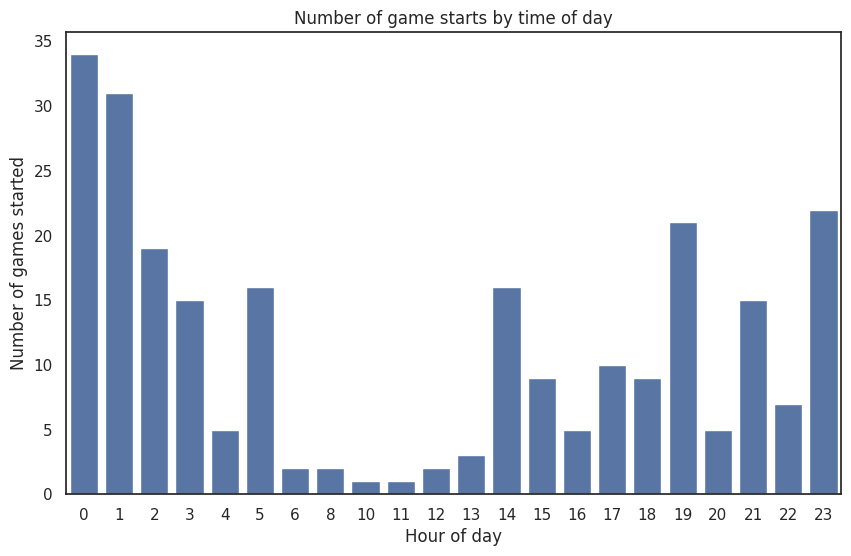

In [49]:
# using start_finish_df compute umber of game starts by time of hour during day (0-24) 
start_finish_df['timestamp_start'] = pd.to_datetime(start_finish_df['timestamp_start'], unit='ms')
start_finish_df['hour'] = start_finish_df['timestamp_start'].dt.hour
game_starts_by_hour = start_finish_df['hour'].value_counts().sort_index()
print(game_starts_by_hour)

# using this data create a plot
plt.figure(figsize=(10, 6))
sns.barplot(x=game_starts_by_hour.index, y=game_starts_by_hour.values)
plt.title('Number of game starts by time of day')
plt.xlabel('Hour of day')
plt.ylabel('Number of games started')
plt.show()